<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/artificial_neural_network(DeepL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.superdatascience.com/blogs/the-ultimate-guide-to-artificial-neural-networks-ann

https://www.udemy.com/course/linear-regression-with-artificial-neural-network/learn/lecture/18888982#overview

image.png

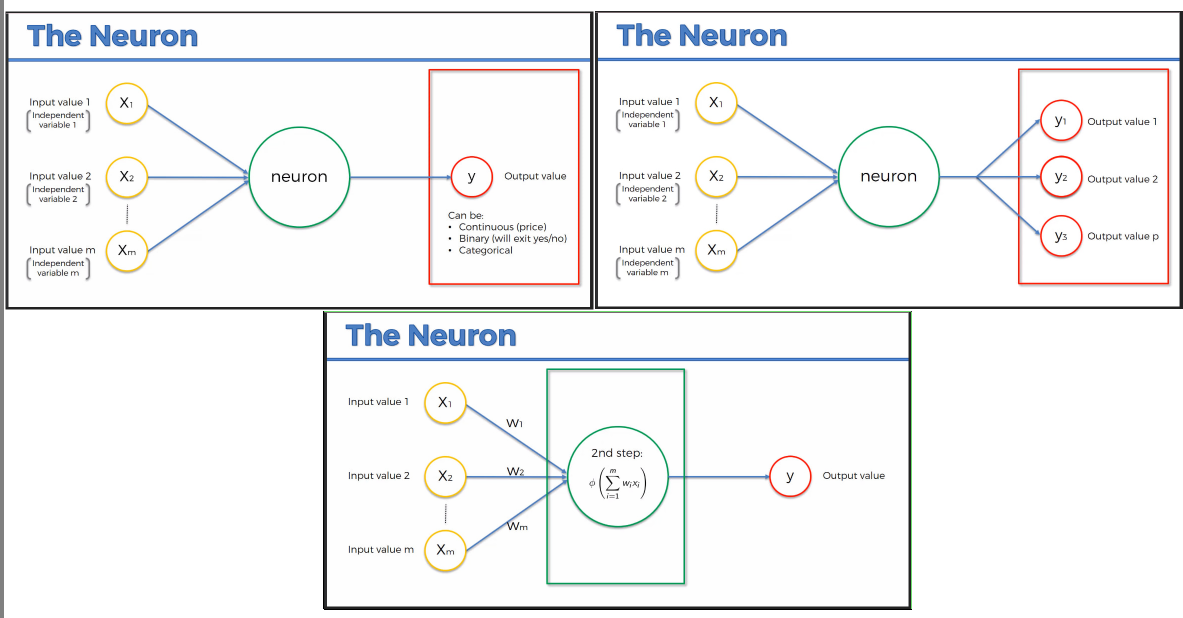

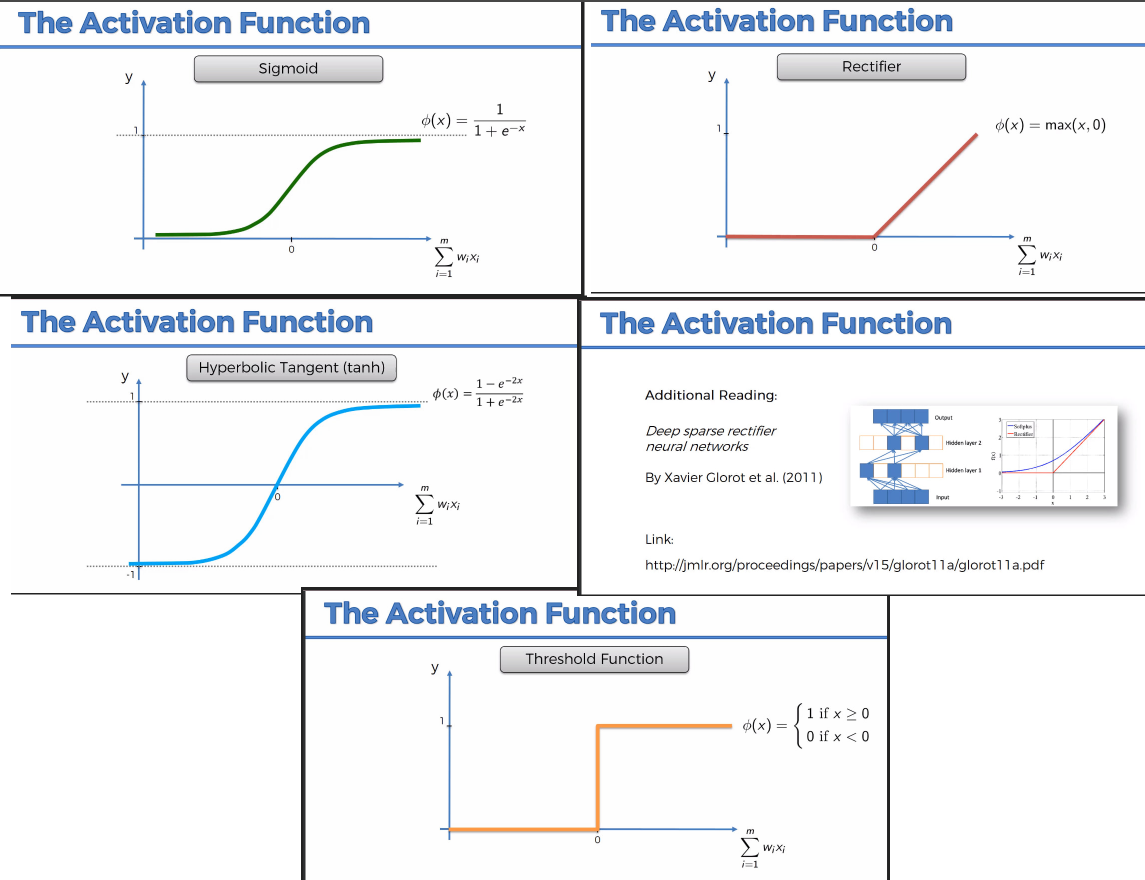

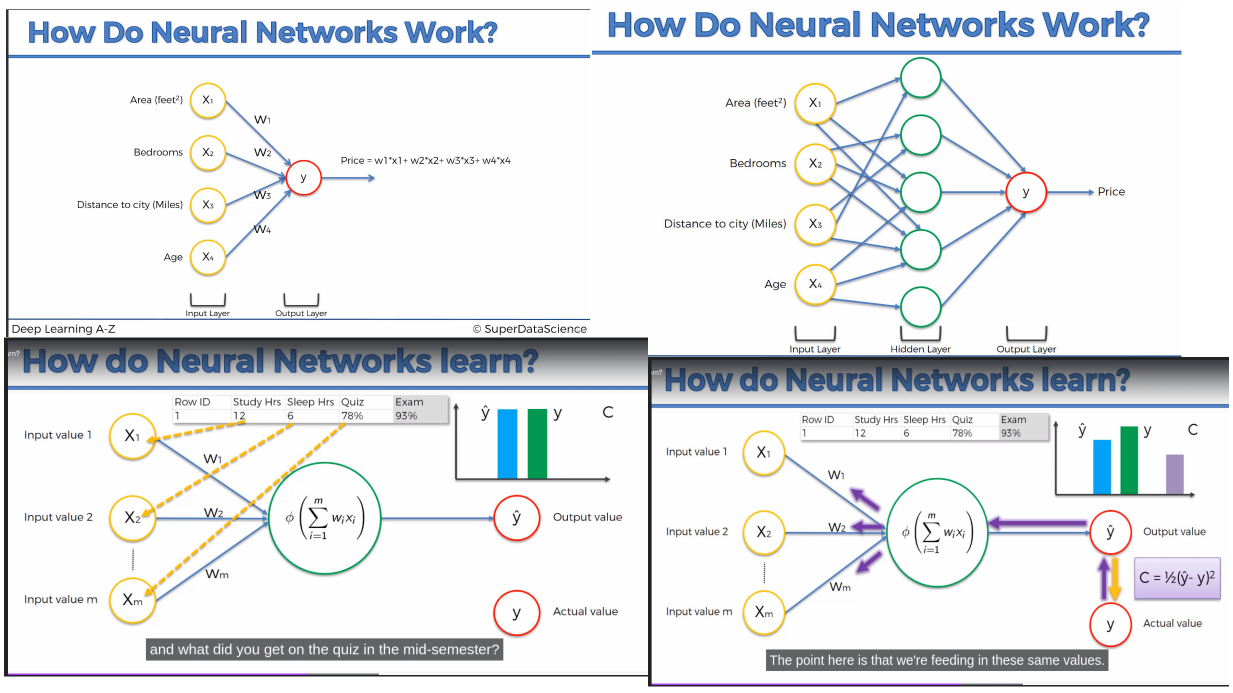

image.png

image.png

# **gradient descent apply on whole rows**
# **stochastic gradient descent apply on one  row(row by row)**
**Stochastic gradient descent AVOID of LOCAL MINIMUM but Gradient descent is good for convex lost values that has not local minimum**

image.png

image.png

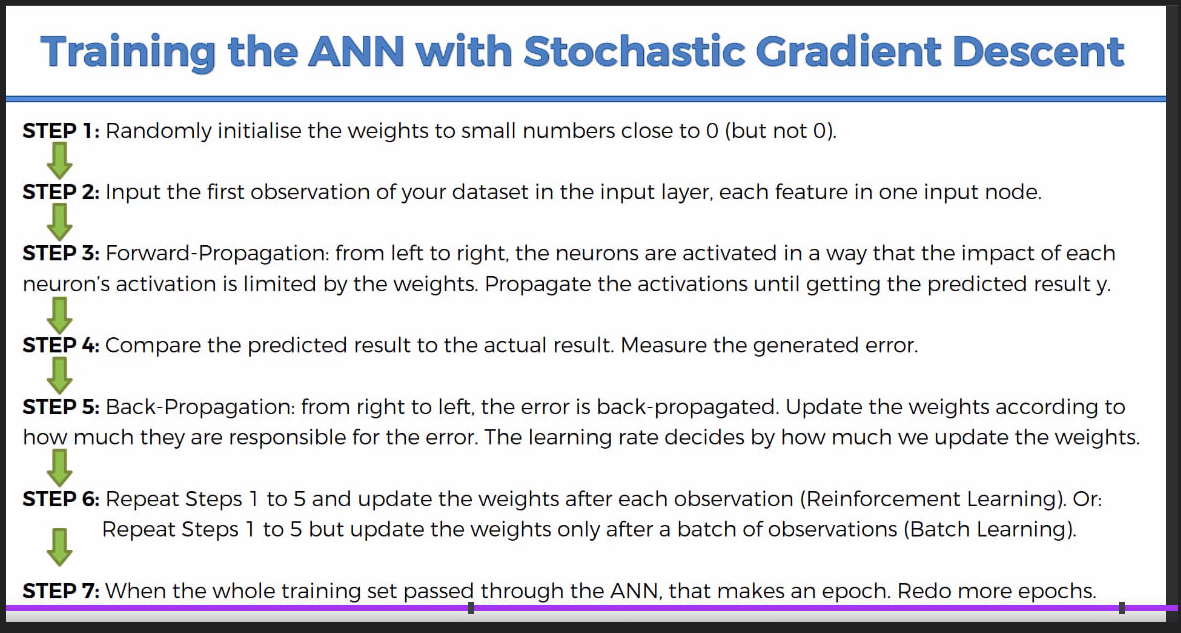

image.png

# Artificial Neural Network

### Importing the libraries

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd #to work with dataset
import tensorflow as tf  #to work with deep learning


In [14]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [21]:
dataset=pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part8_DeepLearning/Section39_ArtificialNeuralNetworks(ANN)/Churn_Modelling.csv')

                        # we keep all the features(columns) that effect on the y or oytput
X=dataset.iloc[:,3:-1].values  #[all rows,column3 to one before last column]
y=dataset.iloc[:,-1].values    #all rows, just last column

In [22]:
print(X)   #show all features(input)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [23]:
print(y) #show dependent values (output) -- the first customer want to stay at the bank(1) and the second one wants to leave(0)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column


```
we must convert all string to number so we use of LAbel Encoding ,forexample for gender to use 0 and 1 instead of Female and Male.

if there is any missing data we should delet its row or use mean or ..
```



In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()                #create object of LabeEnccoder class
X[:, 2]=le.fit_transform(X[:, 2])  # apply labelEncoder on Gender column

In [26]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column


```
we want to convert Geography column to integer, as we have more than 2 different values we must use OneHotEncoding to convert them to integer
```



In [29]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [30]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set


```
after convert all data to integer , now we must split train and test data and train all data
```



In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling


```
now,in DeepLearning we MUST apply Feature scaling on the all data,regardless the values are between 0 to 1 , we must do feature scaling on the all datase
```



In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Part 2 - Building the ANN (artificoal Neural Network)

### Initializing the ANN


```
we must create a Sequence of layers  to create input/hidden/output layers
```



In [33]:
ann=tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [34]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #Dense class creates a simple Fully Connected layer , 6 is number of noron in first layer and its a hyperparameter which we can modify as we want

### Adding the second hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [36]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #units=1 just we want 1 output for each row  because Y column has Binary value (0,1) but if we have 3 different value we must use classification
                                                              #sigmoid => show likihood of each outpout

## Part 3 - Training the ANN

### Compiling the ANN


```
Adam => uses of Sttochastic gradient descend which dont consider Local Minimum

binary_crossentropy=> when we hane Binary classification for the output layer we must use of binary_crossentropy to claculate Loss between Real Y and predicted Y
and [for Non_binary output it should be Categorical_crossEntropy and activation must be Softmax]

accuracy=> during the training we want to evaluate accuracy of prediction


```



In [37]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set


```
batch_size used instead of reading one by one
epoch used to improve the accuracy
```



In [38]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5279 - accuracy: 0.7944
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7989
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8069
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.8104
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8133
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8158
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8200
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8213
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8255
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4001 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France  =>1,0,0(oneHotEncoding)

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution:**

# **Any input of PREDICT method must be in 2 dimension so we use 2 braket [[]]**

In [39]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 116ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [40]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1526   69]
 [ 201  204]]


0.865

```
1526 custumer stay at bank
204 customer leave the bank
```

